In [6]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

In [2]:
data = pd.read_excel('datasets/rural_data.xlsx')
data.head()

,D2D_Distance_m,D2DTx_BS_Dist_m,CUE_BS_Distance_m,D2DTx_CUE_Dist_m,CUE_D2DRx_Dist_m,D2D_ChanGain_linear,D2DTx_BS_Intf_linear,CUE_BS_ChanGain_linear,CUE_D2DRx_Intf_linear,Rx_Sensitivity_dBm,Max_Tx_Power_dBm,Noise_Power_dBm,Intf_Threshold_dBm,Target_SINR_dB,Network_Load,OptimalPower_dBm,CommMode
0,201.211615,922.570686,124.324642,1044.087199,1172.119112,6.518009e-11,8.832627e-14,6.861038e-11,6.402042e-15,-98.075036,22.970162,-95,-104.299580,15.183297,0.889636,22.059535,1
1,150.932859,708.178152,541.841161,985.746752,987.611809,4.170933e-11,5.244750e-13,2.145787e-13,1.766654e-14,-95.469910,21.734840,-95,-104.820289,14.655980,0.588380,-100.000000,0
2,269.648032,789.234107,174.643208,952.718804,733.783890,3.951149e-12,7.509224e-14,2.490961e-11,1.127784e-12,-97.581502,20.968869,-95,-101.024069,12.708323,0.495074,-100.000000,0
3,303.182032,845.337757,159.219168,1004.103428,878.698923,4.911919e-12,5.377405e-14,3.729042e-11,3.695547e-14,-96.238655,21.067918,-95,-101.210769,10.143935,0.204465,-100.000000,0
4,284.604191,631.272314,201.813781,508.132562,728.304811,2.561795e-12,2.601360e-13,1.026536e-11,2.350630e-13,-98.293468,20.488803,-95,-104.647156,16.424193,0.123860,-100.000000,0


In [3]:
data.columns

Index(['D2D_Distance_m', 'D2DTx_BS_Dist_m', 'CUE_BS_Distance_m',
       'D2DTx_CUE_Dist_m', 'CUE_D2DRx_Dist_m', 'D2D_ChanGain_linear',
       'D2DTx_BS_Intf_linear', 'CUE_BS_ChanGain_linear',
       'CUE_D2DRx_Intf_linear', 'Rx_Sensitivity_dBm', 'Max_Tx_Power_dBm',
       'Noise_Power_dBm', 'Intf_Threshold_dBm', 'Target_SINR_dB',
       'Network_Load', 'OptimalPower_dBm', 'CommMode'],
      dtype='object')

In [8]:
data.columns

Index(['D2D_Distance_m', 'D2DTx_BS_Dist_m', 'CUE_BS_Distance_m',
       'D2DTx_CUE_Dist_m', 'CUE_D2DRx_Dist_m', 'D2D_ChanGain_linear',
       'D2DTx_BS_Intf_linear', 'CUE_BS_ChanGain_linear',
       'CUE_D2DRx_Intf_linear', 'Rx_Sensitivity_dBm', 'Max_Tx_Power_dBm',
       'Noise_Power_dBm', 'Intf_Threshold_dBm', 'Target_SINR_dB',
       'Network_Load', 'OptimalPower_dBm', 'CommMode'],
      dtype='object')

In [ ]:

data = shuffle(data).reset_index(drop=True)

    # Split dataset
X = data.drop(columns=["OptimalPower_dBm", 'CommMode'])
y = data['OptimalPower_dBm']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (100000, 15)
y shape: (100000,)


In [14]:
data = pd.read_excel('datasets/train/rural/y_train_rural.xlsx')
print(data.value_counts())

data.shape

OptimalPower_dBm
-100.000000         69451
 17.911117              1
 17.913952              1
 17.914712              1
 17.917489              1
                    ...  
 12.102132              1
 12.109276              1
 12.111902              1
 12.111947              1
 22.981442              1
Name: count, Length: 10550, dtype: int64


(80000, 1)

In [2]:
import matplotlib.pyplot as plt
import pickle


NUM_CLIENTS = 2
with open('results/history.pickle', 'rb') as f:
    history = pickle.load(f)
f.close()

print(history)



2025-08-20 13:58:29.196770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755698309.226669   46359 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755698309.235863   46359 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755698309.264359   46359 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755698309.264415   46359 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755698309.264421   46359 computation_placer.cc:177] computation placer alr

History (loss, distributed):
	round 1: 0.6281795501708984
	round 2: 0.5818309783935547
History (metrics, distributed, evaluate):
{'agg_loss': [(1, 0.6281795501708984), (2, 0.5818309783935547)],
 'agg_mae': [(1, 26.234054582582317), (2, 22.797480242928614)],
 'agg_mse': [(1, 1250.776483358484), (2, 1168.7811605448242)],
 'agg_r2': [(1, 0.3663085139457956), (2, 0.41300104071318394)],
 'agg_rmse': [(1, 34.77647963193452), (2, 33.50752512939127)]}



In [4]:
# accuracy = history.metrics_distributed['agg_accuracy']
# acc_values = [item[1] for item in accuracy]
loss = history.metrics_distributed['agg_loss']
loss_values = [item[1] for item in loss]
print(loss_values)
print(loss)

[0.6281795501708984, 0.5818309783935547]
[(1, 0.6281795501708984), (2, 0.5818309783935547)]


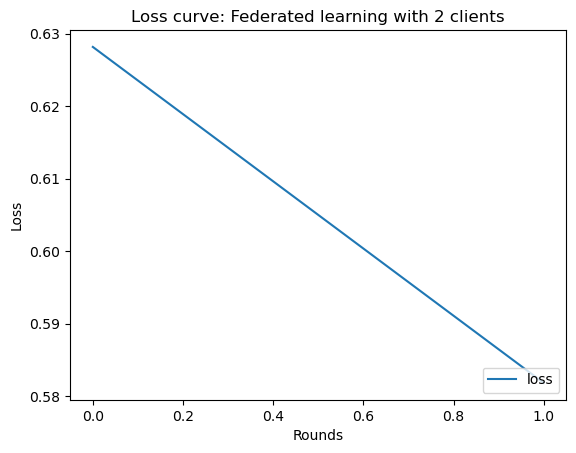

In [5]:
plt.plot(loss_values)
plt.legend(['loss'], loc = 'lower right')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.title(f"Loss curve: Federated learning with {NUM_CLIENTS} clients")
plt.show()